In [2]:
# 导入相关的库
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

In [3]:
# 读取数据集，并选择特征列
dataset = pd.read_csv('data/user_data.csv', encoding='gbk')
X = dataset.iloc[:, 2:4].values
y = dataset.iloc[:, 4].values
dataset

,用户ID,性别,年龄,预计工资,是否购买
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
# 切分数据集，为训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size= 0.25,
                                                   random_state=0)

In [5]:
print(dataset.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(400, 5) (300, 2) (100, 2) (300,) (100,)


In [6]:
X_train[:5]

array([[    44,  39000],
       [    32, 120000],
       [    38,  50000],
       [    32, 135000],
       [    52,  21000]], dtype=int64)

In [7]:
X_test[:5]

array([[   30, 87000],
       [   38, 50000],
       [   35, 75000],
       [   30, 79000],
       [   35, 50000]], dtype=int64)

In [8]:
# 导入标准器，使用它，在训练集X和测试集X进行标准化
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [9]:
X_train[:5]

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358]])

In [10]:
X_test[:5]

array([[-0.80480212,  0.50496393],
       [-0.01254409, -0.5677824 ],
       [-0.30964085,  0.1570462 ],
       [-0.80480212,  0.27301877],
       [-0.30964085, -0.5677824 ]])

In [11]:
# 导入逻辑回归模型类，并实例化，接着在训练集上训练
from sklearn.linear_model import LogisticRegression
classifer=LogisticRegression(random_state=0)
classifer.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [12]:
# 在测试集进行预测
y_pred = classifer.predict(X_test)

temp = pd.DataFrame({'actual': y_test, 'prediction': y_pred})
temp

,actual,prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,1,0
96,0,0
97,1,0
98,1,1


In [14]:
classifer.predict_proba(X_test)[-10:]

array([[0.58308908, 0.41691092],
       [0.21824871, 0.78175129],
       [0.99149077, 0.00850923],
       [0.99207365, 0.00792635],
       [0.96750141, 0.03249859],
       [0.91608066, 0.08391934],
       [0.98628144, 0.01371856],
       [0.52483762, 0.47516238],
       [0.14989075, 0.85010925],
       [0.27844761, 0.72155239]])

In [15]:
# 对比预测结果和实际值，生成混淆矩阵
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  3]
 [ 8 24]]


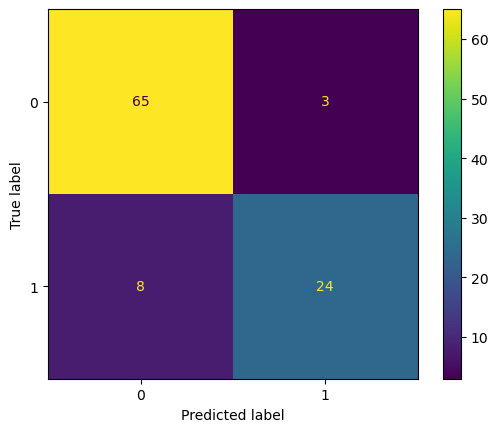

In [16]:
# 一图胜千言，使用图像展示混淆矩阵
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifer.classes_)

disp.plot()

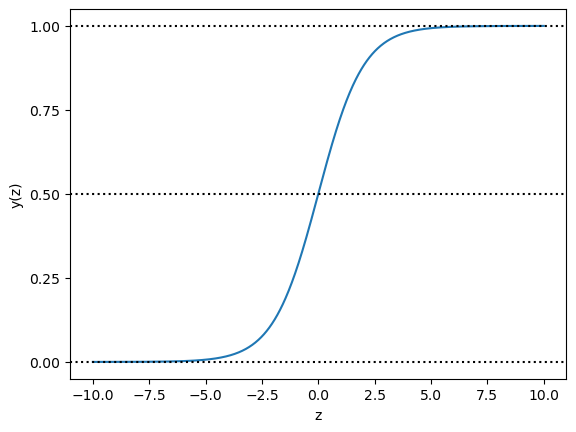

In [19]:
def logistic(input):
    return 1.0 / (1 + np.exp(-input))

z = np.linspace(-10, 10, 1000)
y = logistic(z)
plt.plot(z, y)
plt.axhline(y=0, ls='dotted', color='k')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.axhline(y=1, ls='dotted', color='k')
plt.yticks([0.0, 0.25, 0.5, 0.75, 1.0])
plt.xlabel('z')
plt.ylabel('y(z)')
plt.show()